<a href="https://colab.research.google.com/github/Ryanng-zr/BT4222_Project_Group_12/blob/main/BT4222_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Group 12 Project Overview**

#Problem Statement
Our group aims to investigate the importance of different factors in affecting a student’s academic performance.

#Overview
- Section 1: Attribute Information
- Section 2: Feature Engineering
- Section 3: Exploratory Data Analysis
- Section 4: Machine Learning Methods Part 1 (Predict annual_grades_evaluation)
- Section 5: Feature Importance & Evaluation
- Section 6: Machine Learning Methods Part 2 (Predict G3 >= 10)
- Section 7: Feature Importance & Evaluation
- Section 8: Final Thoughts


#**Import Libraries**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Load Dataset**

In [4]:
students_grades_df_por = pd.read_csv('gdrive/My Drive/BT4222_Group_12/student-por.csv')
students_grades_df_mat = pd.read_csv('gdrive/My Drive/BT4222_Group_12/student-mat.csv', sep = ';')

students_grades_df=pd.concat([students_grades_df_por,students_grades_df_mat], axis = 0)


# **Section 1: Attribute Information & Descriptive Analytics**
# Attributes for student-por.csv (Portuguese language course) dataset:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [5]:
students_grades_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
students_grades_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

From .info(), all columns are non-null, meaning no missing data 

In [7]:
students_grades_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# **Section 2: Feature Engineering**
1. Added 5-Level classification modification
2. Added 'G3_Pass' Feature for G3 scores >= 10

In [8]:
def avg_col():
    columns = ['G1', 'G2', 'G3']
    students_grades_df['annual_grades_avg'] = students_grades_df[columns].mean(
        axis=1)
def classification_grades():
    bins = pd.IntervalIndex.from_tuples(
        [(0, 9.5), (9.5, 11.5), (11.5, 13.5), (13.5, 15.5), (15.5, 20)], closed='right')

    levels = [0, 1, 2, 3, 4]

    new_column = 'annual_grades_evaluation'
    students_grades_df[new_column] = np.array(levels)[
        pd.cut(students_grades_df['annual_grades_avg'], bins=bins).cat.codes]

def g3_pass_fail():
    students_grades_df['G3_pass'] = students_grades_df['G3'] >= 10

In [9]:
avg_col()
classification_grades()

In [10]:
g3_pass_fail()

In [11]:
students_grades_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg,annual_grades_evaluation,G3_pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,7.333333,0,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,10.333333,1,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,12.333333,2,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,14.000000,3,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,12.333333,2,True


In [12]:
students_grades_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   school                    1044 non-null   object 
 1   sex                       1044 non-null   object 
 2   age                       1044 non-null   int64  
 3   address                   1044 non-null   object 
 4   famsize                   1044 non-null   object 
 5   Pstatus                   1044 non-null   object 
 6   Medu                      1044 non-null   int64  
 7   Fedu                      1044 non-null   int64  
 8   Mjob                      1044 non-null   object 
 9   Fjob                      1044 non-null   object 
 10  reason                    1044 non-null   object 
 11  guardian                  1044 non-null   object 
 12  traveltime                1044 non-null   int64  
 13  studytime                 1044 non-null   int64  
 14  failures 

# **Section 3: Exploratory Data Analysis**
1. Correlation Analysis on the different columns
2. Student Grade Distribution (annual_grades_avg, annual_grades_evaluation)
3. Finding Skewness & Kurtosis
4. Outlier Detection & Removal


In [13]:
def correlation_map(data, **kwargs):

    _, ax = plt.subplots(figsize=(35, 35))
    sns.heatmap(data=data.corr(), ax=ax, **kwargs)
    ax.set_title('Correlation Heatmap Of All the Features')

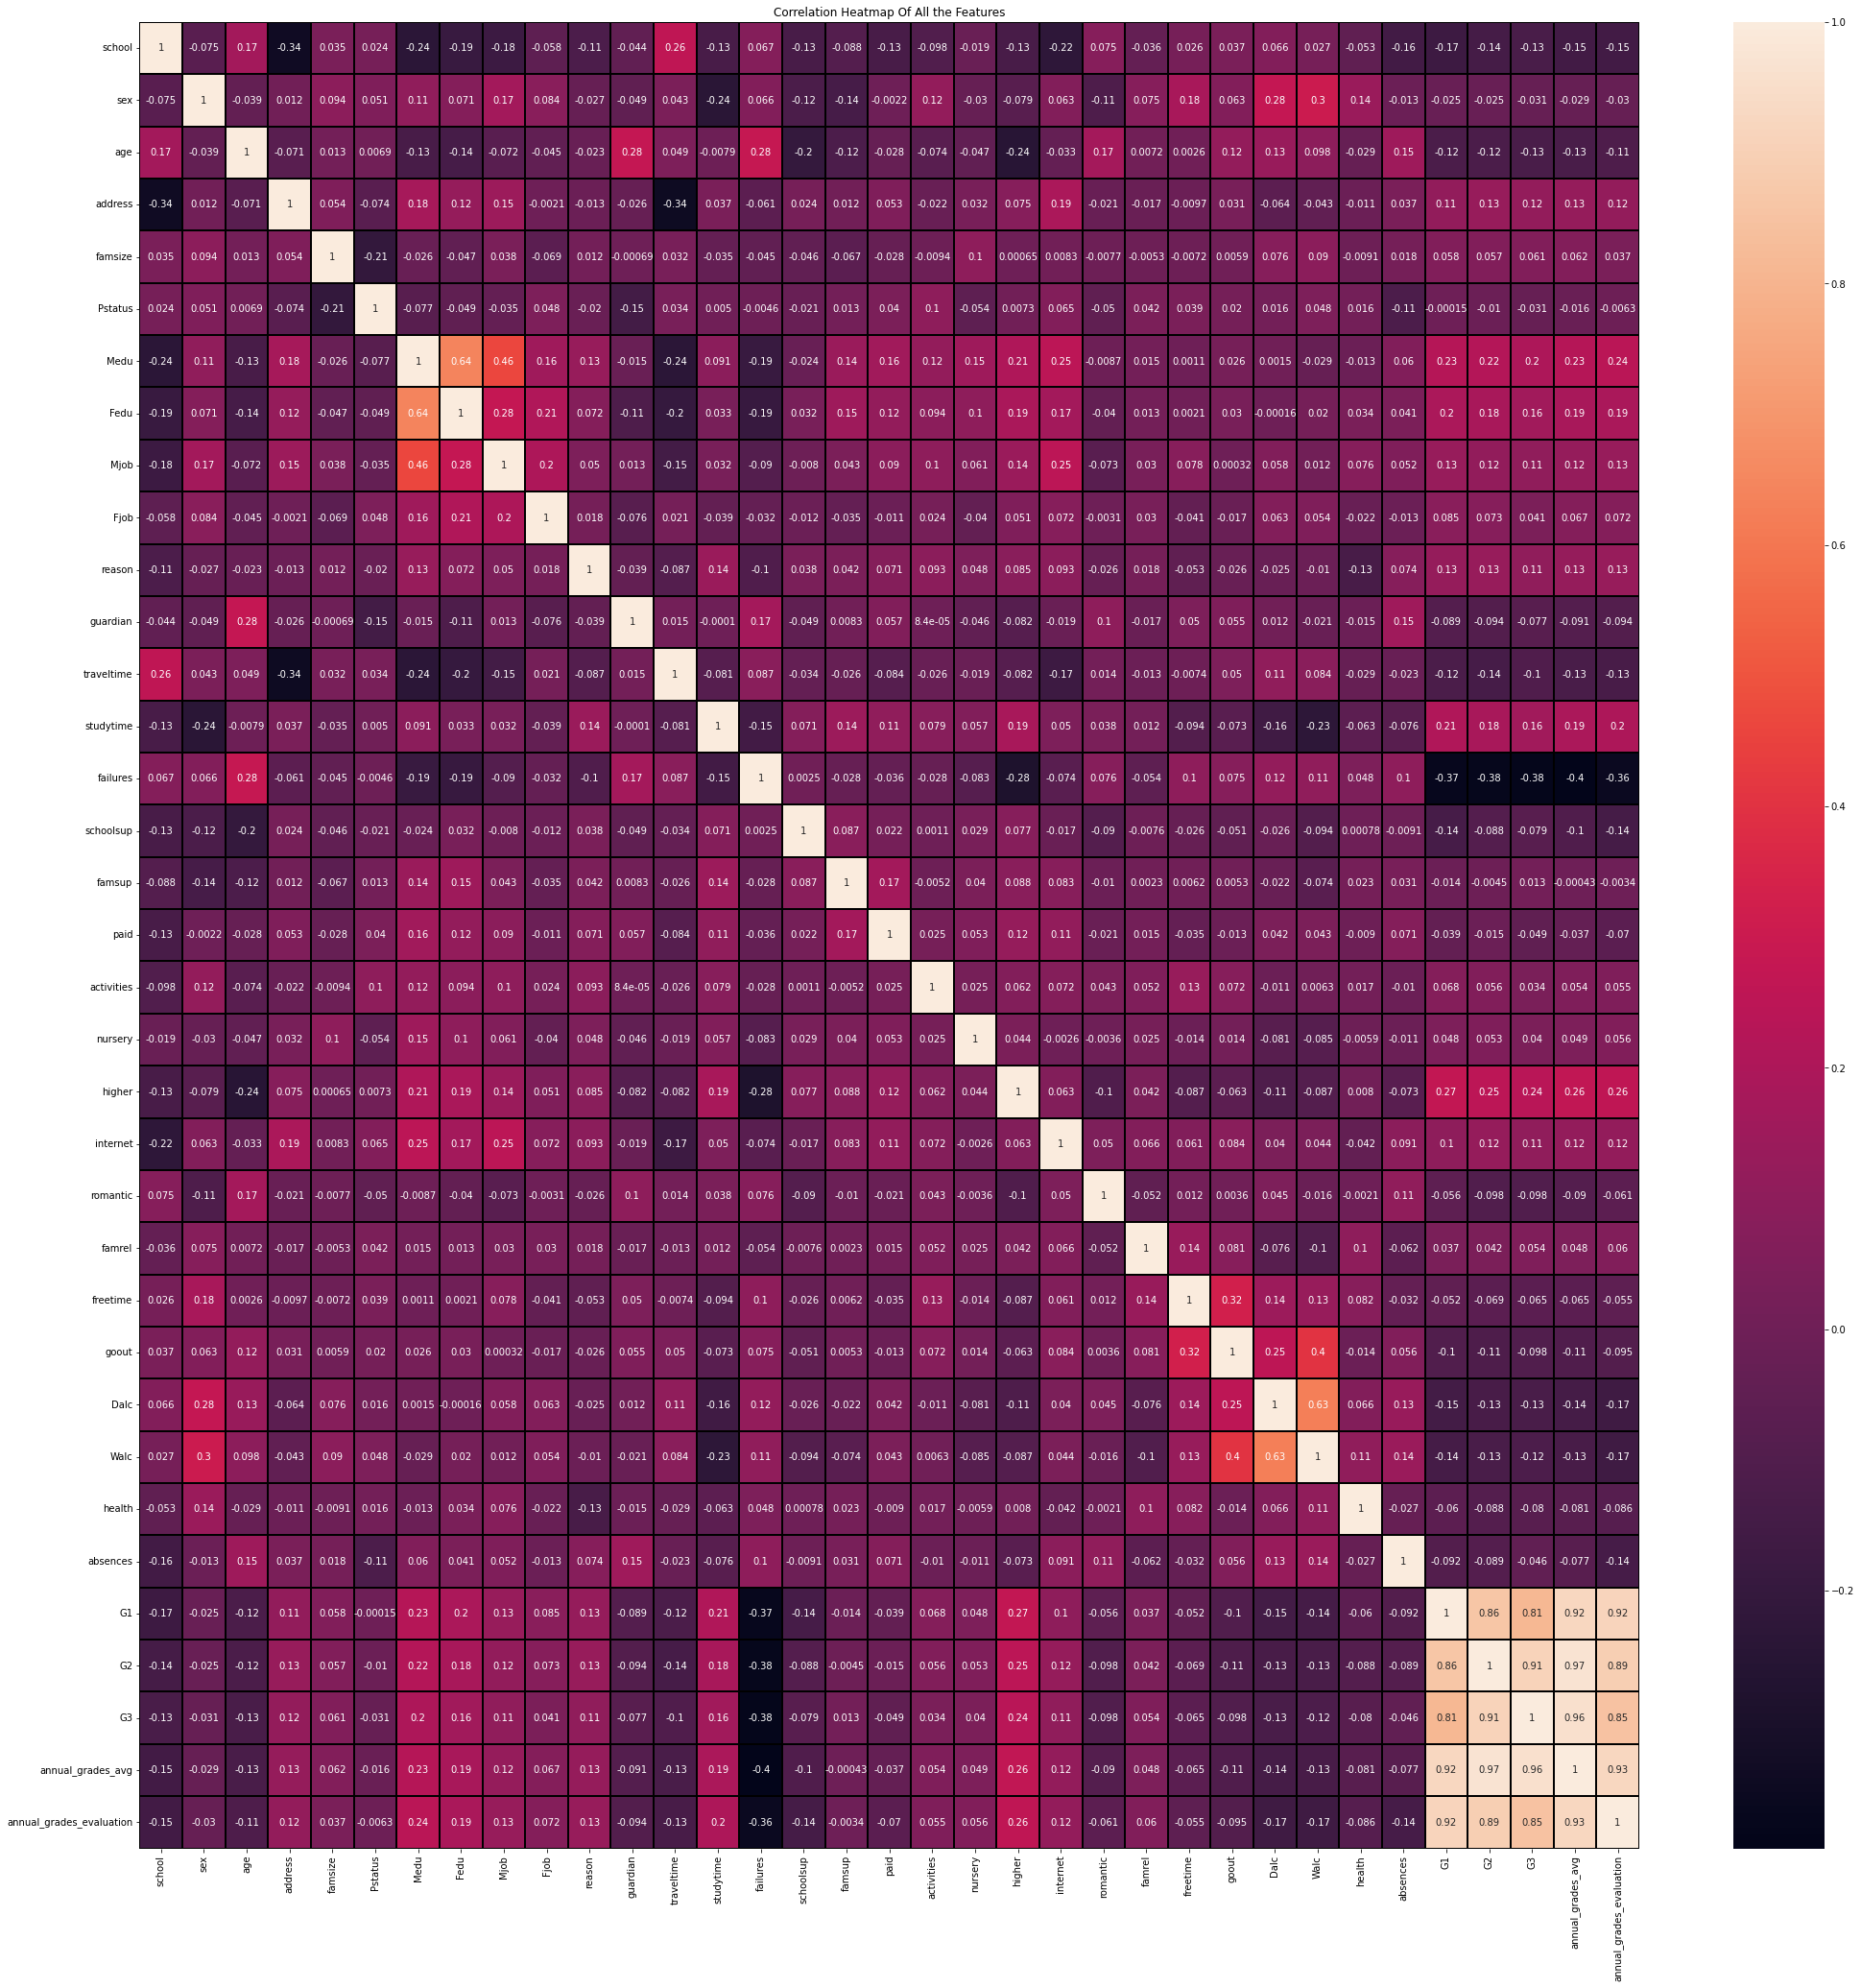

In [14]:
params = {'annot': True, 'fmt': '.2g',
          'linewidths': 1, 'linecolor': 'black'}

encoded_df = students_grades_df.iloc[:, :-1].copy()
col = encoded_df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
encoded_df[col] = ordinal_encoder.fit_transform(encoded_df[col])

correlation_map(encoded_df, **params)

# Section 3.1: Student Grade Distribution


In [15]:
def grades_distri():
    nrows, ncols = 1, 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
    sns.countplot(data=students_grades_df,
                  x='annual_grades_evaluation', ax=axes[0])

    sns.boxplot(data=students_grades_df,
                x='annual_grades_evaluation', y='annual_grades_avg', ax=axes[1])

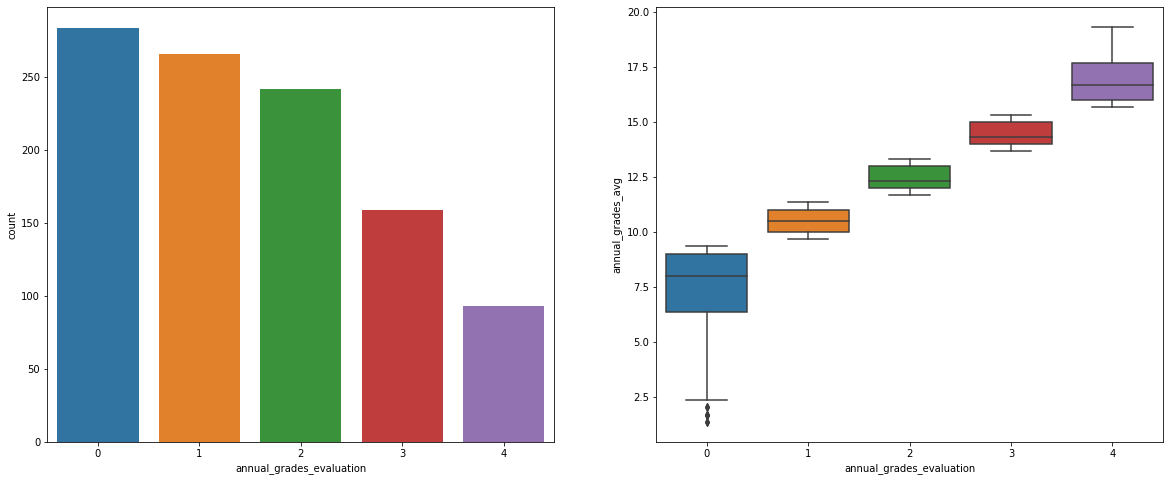

In [16]:
grades_distri()

# Section 3.2: Finding Skewness & Kurtosis of Average Student Grades

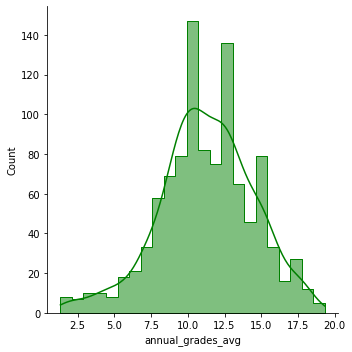

In [17]:
sns.displot(data=students_grades_df['annual_grades_avg'],
            element='step', kde=True, color='green')

In [18]:
print(f"skewness: {students_grades_df['annual_grades_avg'].skew()}")
print(f"kurtosis: {students_grades_df['annual_grades_avg'].kurt()}")

skewness: -0.29016252158394434
kurtosis: 0.24043920434662835


# Section 3.3: Outlier Detection & Removal


In [19]:
def outliers(columns):
    outlier_indices = []
    for column in columns:
        Q1 = students_grades_df[column].quantile(0.25)
        Q3 = students_grades_df[column].quantile(0.75)
        IQR = Q3 - Q1  # IQR is interquartile range.

        mask = (students_grades_df[column] >= Q1 - 1.5 *
                IQR) & (students_grades_df[column] <= Q3 + 1.5 * IQR)
        mask = mask.to_numpy()
        false_indices = np.argwhere(~mask)
        outlier_indices.append(false_indices)
    return np.unique(np.concatenate(outlier_indices).ravel())

In [20]:
numerical_columns = ['age', 'absences']
outlier_indices = outliers(numerical_columns)
outlier_indices

array([  40,  103,  150,  155,  161,  197,  206,  211,  212,  217,  230,
        253,  254,  256,  263,  279,  311,  325,  326,  397,  405,  413,
        667,  678,  689,  723,  738,  752,  767,  772,  782,  814,  832,
        847,  852,  854,  865,  874,  883,  886,  896,  909,  925,  926,
        929,  930,  953,  956,  958,  960,  962,  964,  969,  984, 1028])

In [21]:
print(f'Number of outliers: {len(outlier_indices)}')

Number of outliers: 55


In [22]:
# Delete outliers
for i in range(0, len(outlier_indices)):
  students_grades_df = students_grades_df.drop(students_grades_df.index[i])




# **Section 4: Machine Learning Methods** 
In this section, we use Logistic Regression, Random Forest Classification, and K-nearest Neighbour algorithms to predict the most important features that influence overall average grade of students (annual_grades_evaluation)


#Section 4.1: Descriptive Analysis, Feature Scaling and Encoding

In [23]:
students_grades_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg,annual_grades_evaluation,G3_pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,10.333333,1,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,14.000000,3,True
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,6,12,12,13,12.333333,2,True
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,1,2,10,13,13,12.000000,2,True
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,5,0,12,12,13,12.333333,2,True


In [24]:
# Split dataset
# Prediction of Average grades evaluation
X_eval, y_eval = students_grades_df.iloc[:, : -1], students_grades_df['annual_grades_evaluation']

X_test = X_eval.copy()
X_test = X_test.drop('annual_grades_avg', axis=1)
X_test = X_test.drop('annual_grades_evaluation', axis=1)

In [25]:
X_test.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#Transforming categorical variables into their dichotomous variables

In [26]:
features_cat = ['Mjob','Fjob','reason','guardian']

X_test_cat = pd.get_dummies(X_test, columns = features_cat)

X_test_cat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
5,GP,M,16,U,LE3,T,4,3,1,2,...,1,0,0,0,0,0,1,0,1,0
7,GP,F,17,U,GT3,A,4,4,2,2,...,0,0,1,0,1,0,0,0,1,0
9,GP,M,15,U,GT3,T,3,4,1,2,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [27]:
X_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 1 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             934 non-null    object
 1   sex                934 non-null    object
 2   age                934 non-null    int64 
 3   address            934 non-null    object
 4   famsize            934 non-null    object
 5   Pstatus            934 non-null    object
 6   Medu               934 non-null    int64 
 7   Fedu               934 non-null    int64 
 8   traveltime         934 non-null    int64 
 9   studytime          934 non-null    int64 
 10  failures           934 non-null    int64 
 11  schoolsup          934 non-null    object
 12  famsup             934 non-null    object
 13  paid               934 non-null    object
 14  activities         934 non-null    object
 15  nursery            934 non-null    object
 16  higher             934 non-null    object
 1

In [28]:
categorical_mask = X_test_cat.select_dtypes(include=['object', 'uint8']).apply(pd.Series.nunique) == 2
numerical_mask = X_test_cat.select_dtypes(include=['int64', 'float64']).apply(pd.Series.nunique) > 3

binary_columns = X_test_cat[categorical_mask.index[categorical_mask]]
numerical_columns = X_test_cat[numerical_mask.index[numerical_mask]]

ordinal_encoder = OrdinalEncoder()
min_max_scaler = MinMaxScaler()

new_binary_columns = ordinal_encoder.fit_transform(binary_columns)
new_b_df = pd.DataFrame(new_binary_columns)
new_b_df.columns = binary_columns.columns

new_numerical_columns = min_max_scaler.fit_transform(numerical_columns)
new_num_df = pd.DataFrame(new_numerical_columns)
new_num_df.columns = numerical_columns.columns

X_new=pd.concat([new_b_df,new_num_df], axis = 1)
X_new.columns
X_new.shape


(934, 46)

#Section 4.2: Splitting Dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_eval, test_size=0.2, random_state=42)
print(X_train.head())
print(y_train.head())

     school  sex  address  famsize  Pstatus  schoolsup  famsup  paid  \
408     1.0  0.0      0.0      1.0      1.0        1.0     1.0   0.0   
5       0.0  0.0      1.0      0.0      1.0        0.0     1.0   0.0   
54      0.0  0.0      1.0      1.0      1.0        0.0     1.0   0.0   
275     0.0  0.0      1.0      0.0      1.0        0.0     0.0   0.0   
858     0.0  0.0      1.0      0.0      1.0        0.0     1.0   1.0   

     activities  nursery  ...  famrel  freetime  goout  Dalc  Walc  health  \
408         0.0      1.0  ...    0.75      0.75   0.50  0.25  0.25    1.00   
5           1.0      1.0  ...    1.00      0.25   0.25  0.00  0.00    0.75   
54          1.0      1.0  ...    1.00      0.75   1.00  0.00  0.00    0.75   
275         1.0      1.0  ...    0.75      0.50   0.00  0.00  0.00    1.00   
858         0.0      1.0  ...    0.75      0.75   0.75  0.50  0.50    1.00   

     absences      G1        G2    G3  
408  0.026667  0.6875  0.578947  0.60  
5    0.000000  0.4

#Section 4.3: Implement Base Machine Learning Models
1. Logistic Regression
2. Random Forest Classifier
3. K Nearest Neighbours

In [30]:
import time
models = {"Logistic Regression": LogisticRegression(random_state=42),
               "Random Forest Classifier": RandomForestClassifier(random_state=42),
               "KNN": KNeighborsClassifier(),
}
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    # dictionary to keep model score
    model_score = {}
    
    for name, model in models.items():
        start = time.time()
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test,y_test)
        end = time.time()
        print(name + " model took: " + str((end - start)) + " seconds.")
    return model_score

model_score = fit_score(models=models,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test)
model_score

Logistic Regression model took: 0.08685636520385742 seconds.
Random Forest Classifier model took: 0.2249293327331543 seconds.
KNN model took: 0.018304109573364258 seconds.


{'Logistic Regression': 0.7005347593582888,
 'Random Forest Classifier': 0.8983957219251337,
 'KNN': 0.3155080213903743}

In [31]:
model_compare = pd.DataFrame(model_score,index=["Accuracy"])
model_compare

,Logistic Regression,Random Forest Classifier,KNN
Accuracy,0.700535,0.898396,0.315508


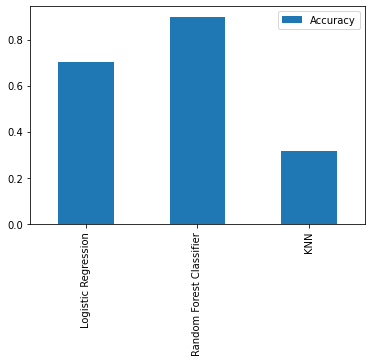

In [32]:
model_compare.T.plot(kind="bar")

# Section 4.4: Cross Validation
In this section, we attempt to improve model performance by using Cross Validation.


In [33]:
Kfold = StratifiedKFold(n_splits=5)
scoring = {'acc': 'accuracy'}

def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in models.keys()}
    for i in models.keys():
        cv_score = cross_validate(models[i],
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[i].append(cv_score)
    return np.array(train_acc_results), cv_scores

In [34]:
results, folds_scores = cv_fit_models()

In [35]:
def best_esti():
    best_estimators = {classifier_name: [] for classifier_name in models.keys()}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [36]:
best_estimators = best_esti()

In [37]:
def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    
    return scores

In [38]:
scores = gather_metrics_scores()

In [39]:
def train_test_accur(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

In [40]:
results_df = pd.DataFrame({'Model': models.keys(),
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

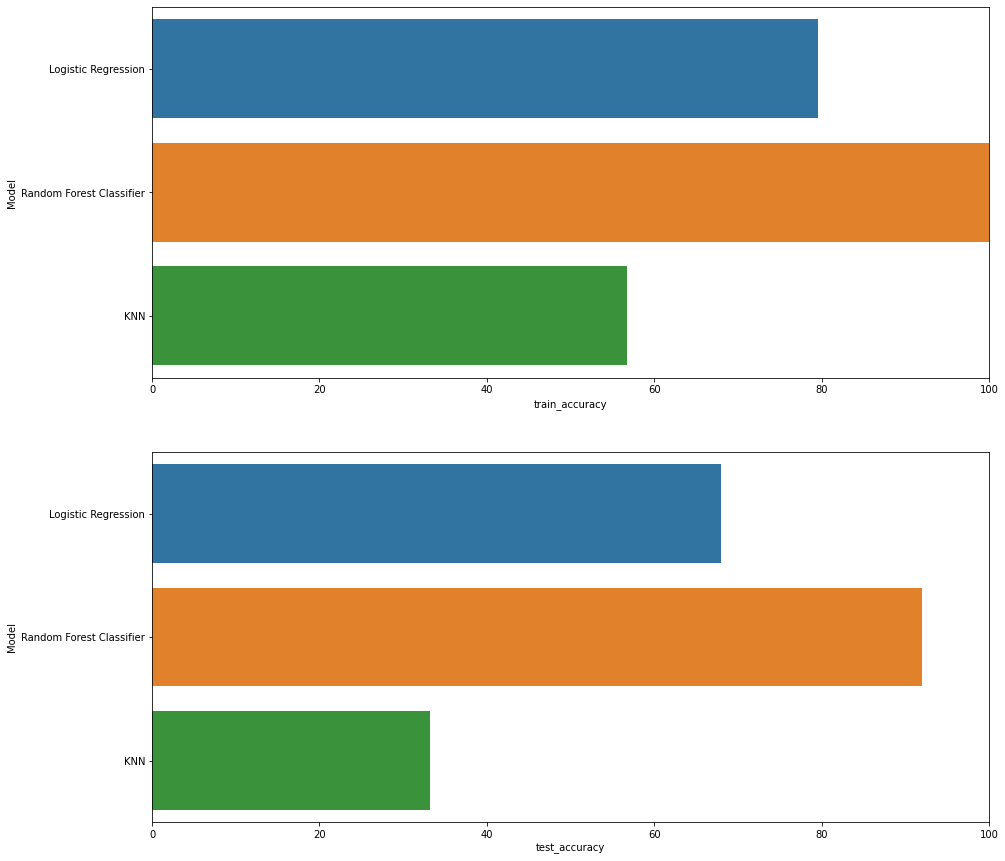

In [41]:
train_test_accur(results_df)


In [42]:
def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

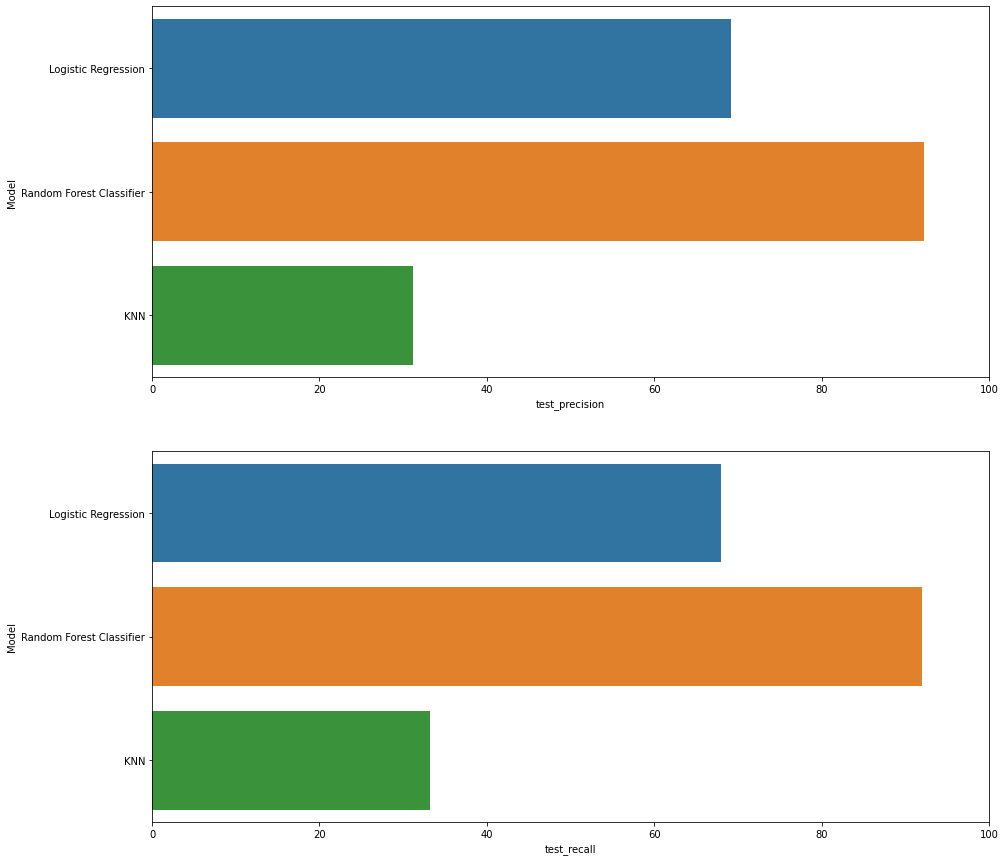

In [43]:
plot_precision_recall(results_df)

#Findings:
Results are not satisfactory:
1. Logistic Regression still has poor accuracy & recall.
2. Random Forest Classifier is overfitted on train data.
3. KNN still has very poor accuracy.

Hence, we conclude that cross-validation is not a good method for achieving high accuracy to fit our business needs.

#Section 4.5: Hyperparameter Tuning
In this section, we look to improve each of our model scores through Hyperparameter tuning. 
We explored using tuning methods such as RandomizedSearchCV & GridSearchCV.

In [44]:
# RandomizedSearchCV hyperparametergrid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                #loguniform(1e-5, 100S)
                "solver": ["liblinear", "lbfgs", "newton-cg"],
              "penalty": ['l1', 'l2']}
np.random.seed(42)
start = time.time()
rs_log_reg = RandomizedSearchCV(LogisticRegression(random_state=42),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=1000,
                                verbose=True)
# Fit random hyperparameter search
rs_log_reg.fit(X_train, y_train)
end = time.time()
print("Random Search CV Tuned Logistic Regression took: " + str((end - start)) + "seconds.")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Random Search CV Tuned Logistic Regression took: 83.97056341171265seconds.


In [45]:
rs_log_reg.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10000.0}

In [46]:
rs_log_reg.score(X_test, y_test)

0.8877005347593583

In [47]:
#GridSearchCV hyperparameter tuning
np.random.seed(42)

log_reg_grid = {"C": np.logspace(-4,4,30),
              "solver": ["liblinear", "lbfgs", "newton-cg"],
              "penalty": ['l1', 'l2']}
start = time.time()

gs_log_reg = GridSearchCV(LogisticRegression(random_state=42),
                          param_grid=log_reg_grid,
                          cv = 5,
                          n_jobs=-1,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)
end = time.time()
print("Grid Search CV Tuned Logistic Regression took: " + str((end - start)) + "seconds.")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Grid Search CV Tuned Logistic Regression took: 82.38741540908813seconds.


In [48]:
gs_log_reg.best_params_

{'C': 10000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
gs_log_reg.score(X_test,y_test)

0.8877005347593583

Maximum KNN score on Test data: 36.36%
Tuned KNN took: 1.4399940967559814seconds.


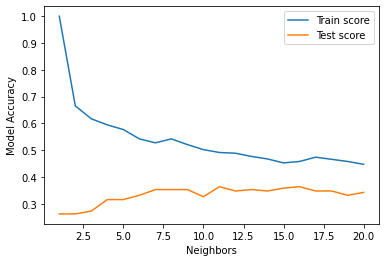

In [50]:
# First Let's tune KNN
train_score = []
test_score  = []

# Let's create a list for different neighbors
neighbors = range(1, 21)
start = time.time()
# Setup knn instance
knn = KNeighborsClassifier()

# loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_score.append(knn.score(X_test, y_test))
end = time.time()
# Let's Plot And Viusalize The KNN Tunned Model
plt.plot(neighbors, train_score, label= "Train score")
plt.plot(neighbors, test_score, label= "Test score")
plt.xlabel("Neighbors")
plt.ylabel("Model Accuracy")
plt.legend()

print(f"Maximum KNN score on Test data: {max(test_score)*100 :.2f}%")
print("Tuned KNN took: " + str((end - start)) + "seconds.")

In [51]:
np.random.seed(42)

rf_random_grid = {"n_estimators": np.arange(10,1000,50),
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2),
                  "bootstrap": [True, False],
                  "max_features": ['auto', 'sqrt']
}

start = time.time()
rf_rs = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                           param_distributions=rf_random_grid,
                           cv=5,
                           verbose=True,
                           n_iter=1000)
rf_rs.fit(X_train, y_train)
end = time.time()
print("Random Search CV Tuned Random Forest Classifier took: " + str((end - start)) + "seconds.")

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Random Search CV Tuned Random Forest Classifier took: 4304.853319644928seconds.


In [52]:
rf_rs.best_params_

{'n_estimators': 960,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [53]:
rf_rs.score(X_test, y_test)

0.9037433155080213

#Results: Initial vs Tuned Model Score
1. Great improvement in accuracy for Logistic Regression.
2. Minimal improvement in accuracy for Random Forest, and remains the best model.
3. Not enough improvement in accuracy for KNN, accuracy is very poor.

In [54]:
model_score
#compare with the new hyperparameter tuned model acc 

{'Logistic Regression': 0.7005347593582888,
 'Random Forest Classifier': 0.8983957219251337,
 'KNN': 0.3155080213903743}

In [55]:
tuned_model_score = {}
tuned_model_score['Logistic Regression'] = rs_log_reg.score(X_test, y_test)
tuned_model_score['Random Forest Classifier'] = rf_rs.score(X_test, y_test)
tuned_model_score['KNN'] = max(test_score)
tuned_model_score

{'Logistic Regression': 0.8877005347593583,
 'Random Forest Classifier': 0.9037433155080213,
 'KNN': 0.36363636363636365}

#Section 4.6: Stacking
In this section, we explore using stacking to improve our model accuracy.

In [56]:
# Create train and test splits
X_train_full, X_test_new, y_train_full, y_test_new = train_test_split(X_new, y_eval, test_size=0.2, random_state=42)
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42)

In [57]:
X_val_predictions = np.empty((len(X_valid), 3), dtype = object)

X_val_predictions[:, 0] = models['Logistic Regression'].predict(X_valid)
X_val_predictions[:, 1] = models['Random Forest Classifier'].predict(X_valid)
X_val_predictions[:, 2] = models['KNN'].predict(X_valid)

In [58]:
start = time.time()
rf = RandomForestClassifier(oob_score=True, random_state=42)
rf_oob_pred = rf.fit(X_val_predictions, y_valid)
end = time.time()
print("Stacked Random Forest Classifier took: " + str((end - start)) + "seconds.")

Stacked Random Forest Classifier took: 0.20490503311157227seconds.


In [59]:
rf.oob_score_


0.98

In [60]:
from sklearn.metrics import accuracy_score
rf_y_pred = rf_oob_pred.predict(X_val_predictions)
print('\nThe score of the training set is:', accuracy_score(y_valid, rf_y_pred))



The score of the training set is: 1.0


In [61]:
X_test_predictions = np.empty((len(X_test), 3), dtype = object)

X_test_predictions[:, 0] = gs_log_reg.predict(X_test)
X_test_predictions[:, 1] = rf_rs.predict(X_test)
X_test_predictions[:, 2] = knn.predict(X_test)

In [62]:
y_pred = rf.predict(X_test_predictions)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9037433155080213

#Results: Stacking vs Hyperparameter Tuned Model
1. No change in accuracy for Random Forest, we proceeded using the HyperParameter tuned model for our feature importance evaluation.
2. We also found that our oob score is high, hence shows that our findings are generalisable.

In [64]:
tuned_model_score['Stacked Random Forest Classifier'] = accuracy_score(y_test, y_pred)
tuned_model_score

{'Logistic Regression': 0.8877005347593583,
 'Random Forest Classifier': 0.9037433155080213,
 'KNN': 0.36363636363636365,
 'Stacked Random Forest Classifier': 0.9037433155080213}

#**Section 5: Feature Importance, Confusion Matrix, Classification Report**
In this section, we will report our findings for:
1. Logistic Regression
2. K Nearest Neighbour
3. Random Forest Regression

#Section 5.1: Logistic Regression

Feature Importance

0.8877005347593583


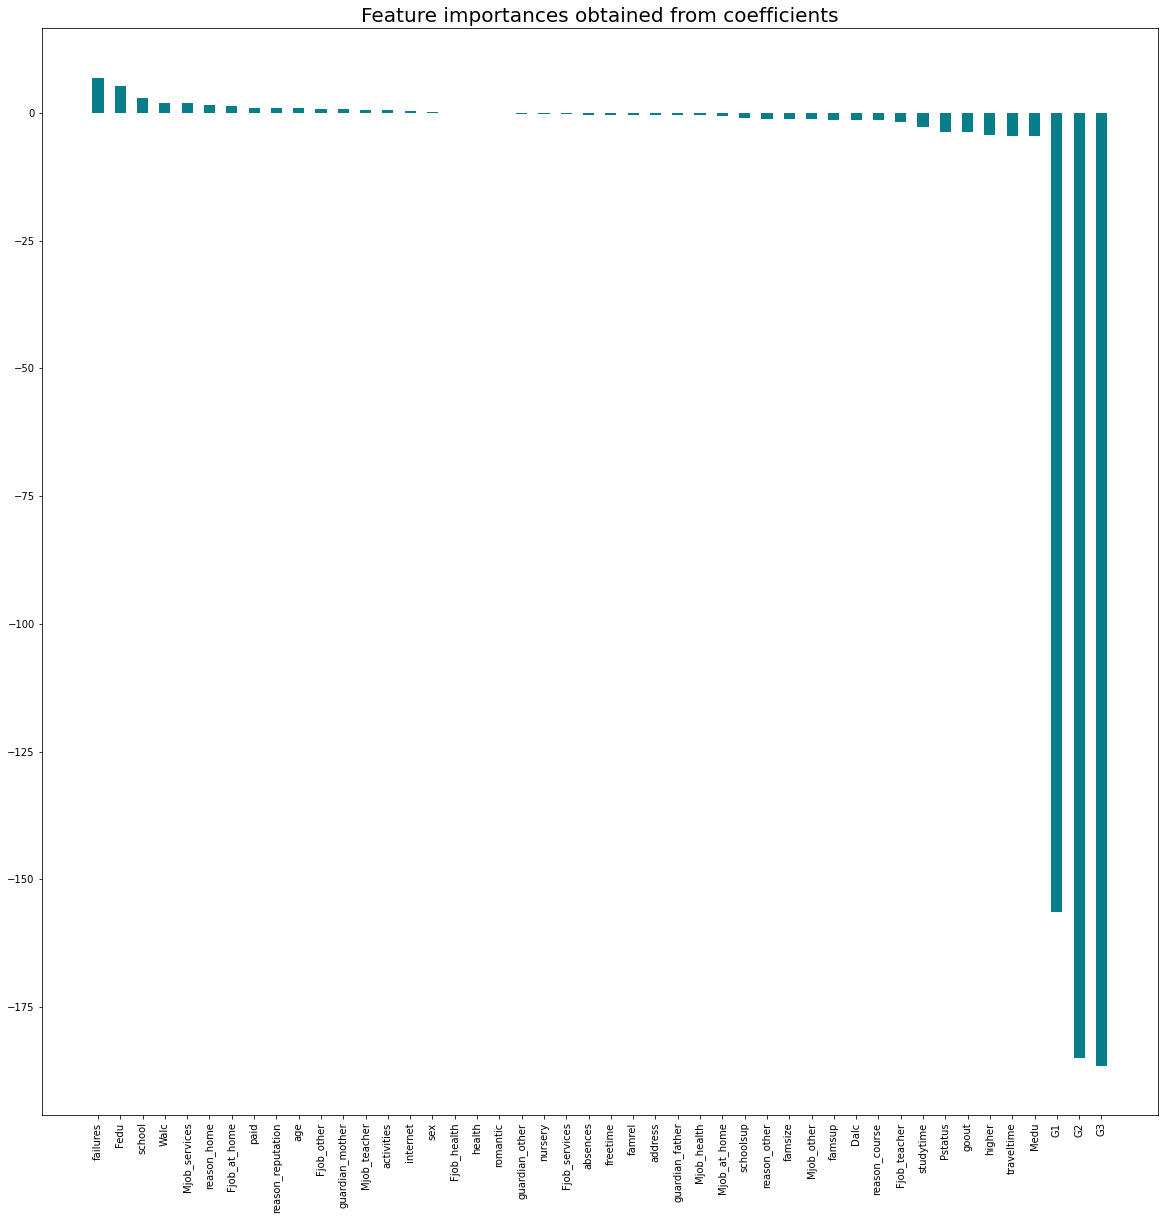

In [65]:
classifierLR = LogisticRegression(C= 10000.0, penalty= 'l2', solver= 'newton-cg', random_state=42)
classifierLR.fit(X_train,y_train)

#Score LR
print(classifierLR.score(X_test, y_test))

#Feature Importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': classifierLR.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20,20))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B',width=0.5, )
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


#Prediction
y_pred_logi = classifierLR.predict(X_test)

Classification Report & Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix
cm_logi=confusion_matrix(y_test,y_pred_logi)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_logi=classification_report(y_test,y_pred_logi)

In [67]:
print(cm_logi)
print(report_logi)

[[53  1  0  0  0]
 [ 0 48  4  0  0]
 [ 0  2 28  3  0]
 [ 0  0  6 23  3]
 [ 0  0  0  2 14]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.94      0.92      0.93        52
           2       0.74      0.85      0.79        33
           3       0.82      0.72      0.77        32
           4       0.82      0.88      0.85        16

    accuracy                           0.89       187
   macro avg       0.86      0.87      0.87       187
weighted avg       0.89      0.89      0.89       187



#Section 5.2: K Nearest Neighbour

Classification Report & Confusion Matrix

In [68]:
y_pred_knn = knn.predict(X_test)

cm_knn=confusion_matrix(y_test,y_pred_knn)

#determining the precision,recall and f1-score 

report_knn=classification_report(y_test,y_pred_knn)

In [69]:
print(cm_knn)
print(report_knn)

[[25 18  9  2  0]
 [13 15 21  3  0]
 [ 3  9 18  3  0]
 [ 5  6 15  5  1]
 [ 0  2  6  7  1]]
              precision    recall  f1-score   support

           0       0.54      0.46      0.50        54
           1       0.30      0.29      0.29        52
           2       0.26      0.55      0.35        33
           3       0.25      0.16      0.19        32
           4       0.50      0.06      0.11        16

    accuracy                           0.34       187
   macro avg       0.37      0.30      0.29       187
weighted avg       0.37      0.34      0.33       187



#Section 5.3: Random Forest Classifier

Feature Importance

0.9037433155080213
school:0.0027643648672215555
sex:0.0045378598328707186
address:0.004481283575263053
famsize:0.0034288103552668407
Pstatus:0.0012578717010437773
schoolsup:0.004407262758911524
famsup:0.002945418376254654
paid:0.003363038619197326
activities:0.0041826645836995574
nursery:0.0026148325245083735
higher:0.004691787411074067
internet:0.0030045152570589936
romantic:0.003304361852750547
Mjob_at_home:0.0031955625247742643
Mjob_health:0.0020601442987775937
Mjob_other:0.0031650250497706634
Mjob_services:0.002357240906249289
Mjob_teacher:0.002353985745132965
Fjob_at_home:0.0012110686892023192
Fjob_health:0.0005448357857454762
Fjob_other:0.0030610489232917267
Fjob_services:0.0033015830518169317
Fjob_teacher:0.001786699808081345
reason_course:0.003659544190243419
reason_home:0.0028242987348095785
reason_other:0.0019472311430248934
reason_reputation:0.003122124023617265
guardian_father:0.003223314446577523
guardian_mother:0.0032740380836600237
guardian_other:0.00135967559793787
age:

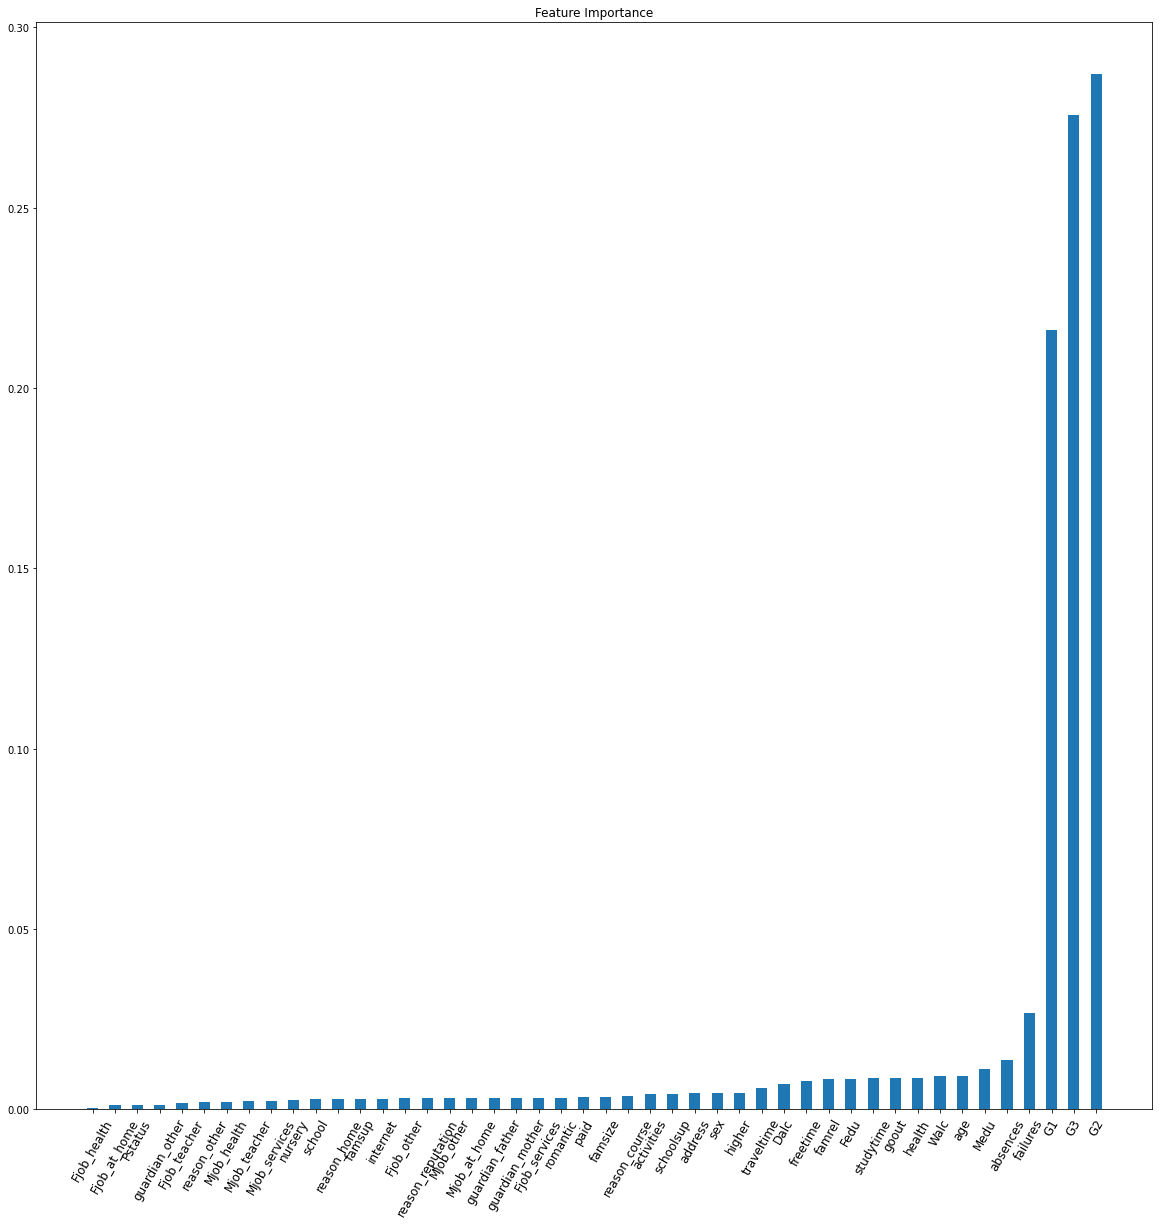

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
#RandomForest
classifierRF=RandomForestClassifier(n_estimators= 960, min_samples_split= 14, min_samples_leaf= 3, max_features= 'sqrt', max_depth= None, bootstrap= True, random_state=42)
classifierRF.fit(X_train,y_train)

print(classifierRF.score(X_test, y_test))



#predicting the test set re4sults
y_pred_random=classifierRF.predict(X_test)

importances=classifierRF.feature_importances_
for feature, importance in zip(X_train.columns, classifierRF.feature_importances_):
    print("{}:{}".format(feature, importance))
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Barplot: Add bars

plt.figure(figsize=(20,20))
plt.bar(range(X_test.shape[1]), importances[indices],width=0.5)
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]),names, rotation=60, fontsize = 12)
#from here we cam see that absences is the important features for determining the grades of students

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

#determinnig the confusion matrix
from sklearn.metrics import confusion_matrix
cm_random=confusion_matrix(y_test,y_pred_random)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_random=classification_report(y_test,y_pred_random)


Classification Report & Confusion Matrix

In [71]:
print(cm_random)
print(report_random)

[[54  0  0  0  0]
 [ 2 45  5  0  0]
 [ 0  3 29  1  0]
 [ 0  0  6 26  0]
 [ 0  0  0  1 15]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.94      0.87      0.90        52
           2       0.72      0.88      0.79        33
           3       0.93      0.81      0.87        32
           4       1.00      0.94      0.97        16

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.91       187



#**Section 6: Extra Analysis on Student Performance in Final Exams**
In this section, we explore how student performance in prior exams (e.g. G1, G2) can affect their final exam score (G3). As we found from Section 5 that G2 and G1 are our top 3 most important features, we look into whether doing well in them will indeed affect our G3 score. 

Our predicted value in this section would be 'G3_pass', which is G3 >= 10.

#Section 6.1: Descriptive Analysis, Feature Scaling & Encoding

In [72]:
#Binary Classification for Pass/fail of G3 (Score >= 10)
X_pass, y_pass = students_grades_df.iloc[:, : -1], students_grades_df.iloc[:, -1]

X_pass_test = X_pass.copy()
X_pass_test = X_pass_test.drop('G3', axis=1)
X_pass_test = X_pass_test.drop('annual_grades_avg', axis=1)
X_pass_test = X_pass_test.drop('annual_grades_evaluation', axis=1)

In [73]:
X_pass_test.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [74]:
features_cat = ['Mjob','Fjob','reason','guardian']
X_test_pass_cat = pd.get_dummies(X_pass_test, columns = features_cat)

X_test_cat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
5,GP,M,16,U,LE3,T,4,3,1,2,...,1,0,0,0,0,0,1,0,1,0
7,GP,F,17,U,GT3,A,4,4,2,2,...,0,0,1,0,1,0,0,0,1,0
9,GP,M,15,U,GT3,T,3,4,1,2,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [75]:
X_test_pass_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 1 to 394
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             934 non-null    object
 1   sex                934 non-null    object
 2   age                934 non-null    int64 
 3   address            934 non-null    object
 4   famsize            934 non-null    object
 5   Pstatus            934 non-null    object
 6   Medu               934 non-null    int64 
 7   Fedu               934 non-null    int64 
 8   traveltime         934 non-null    int64 
 9   studytime          934 non-null    int64 
 10  failures           934 non-null    int64 
 11  schoolsup          934 non-null    object
 12  famsup             934 non-null    object
 13  paid               934 non-null    object
 14  activities         934 non-null    object
 15  nursery            934 non-null    object
 16  higher             934 non-null    object
 1

In [76]:
# for binary classification model


categorical_mask_2 = X_test_pass_cat.select_dtypes(include=['object', 'uint8']).apply(pd.Series.nunique) == 2
numerical_mask_2 = X_test_pass_cat.select_dtypes(include=['int64', 'float64']).apply(pd.Series.nunique) > 3

binary_columns_2 = X_test_pass_cat[categorical_mask_2.index[categorical_mask_2]]
numerical_columns_2 = X_test_pass_cat[numerical_mask_2.index[numerical_mask_2]]


ordinal_encoder = OrdinalEncoder()
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

new_binary_columns_2 = ordinal_encoder.fit_transform(binary_columns_2)
new_b_df_2 = pd.DataFrame(new_binary_columns_2)
new_b_df_2.columns = binary_columns_2.columns

new_numerical_columns_2 = min_max_scaler.fit_transform(numerical_columns_2)
new_num_df_2 = pd.DataFrame(new_numerical_columns_2)
new_num_df_2.columns = numerical_columns_2.columns

X_new_2 = pd.concat([new_b_df_2,new_num_df_2], axis = 1)
print(X_new_2.columns)
print(X_new_2.shape)


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
(934, 45)


In [77]:
y_pass_df = pd.DataFrame(y_pass)
y_pass_df["G3_pass"] = y_pass_df["G3_pass"].astype(int)
y_pass_df

,G3_pass
1,1
3,1
5,1
7,1
9,1
...,...
390,0
391,1
392,0
393,1


In [78]:
print(X_new_2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             934 non-null    float64
 1   sex                934 non-null    float64
 2   address            934 non-null    float64
 3   famsize            934 non-null    float64
 4   Pstatus            934 non-null    float64
 5   schoolsup          934 non-null    float64
 6   famsup             934 non-null    float64
 7   paid               934 non-null    float64
 8   activities         934 non-null    float64
 9   nursery            934 non-null    float64
 10  higher             934 non-null    float64
 11  internet           934 non-null    float64
 12  romantic           934 non-null    float64
 13  Mjob_at_home       934 non-null    float64
 14  Mjob_health        934 non-null    float64
 15  Mjob_other         934 non-null    float64
 16  Mjob_services      934 non

#Section 6.2: Splitting Data

In [79]:
# for binary classification model
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_new_2, y_pass_df, test_size=0.2, random_state=42)
print(X_train_class.head())
print(y_train_class.head())

     school  sex  address  famsize  Pstatus  schoolsup  famsup  paid  \
408     1.0  0.0      0.0      1.0      1.0        1.0     1.0   0.0   
5       0.0  0.0      1.0      0.0      1.0        0.0     1.0   0.0   
54      0.0  0.0      1.0      1.0      1.0        0.0     1.0   0.0   
275     0.0  0.0      1.0      0.0      1.0        0.0     0.0   0.0   
858     0.0  0.0      1.0      0.0      1.0        0.0     1.0   1.0   

     activities  nursery  ...  failures  famrel  freetime  goout  Dalc  Walc  \
408         0.0      1.0  ...       0.0    0.75      0.75   0.50  0.25  0.25   
5           1.0      1.0  ...       0.0    1.00      0.25   0.25  0.00  0.00   
54          1.0      1.0  ...       0.0    1.00      0.75   1.00  0.00  0.00   
275         1.0      1.0  ...       0.0    0.75      0.50   0.00  0.00  0.00   
858         0.0      1.0  ...       0.0    0.75      0.75   0.75  0.50  0.50   

     health  absences      G1        G2  
408    1.00  0.026667  0.6875  0.578947  
5 

#Section 6.3: Machine Learning Base Models
1. Logistic Regression
2. Random Forest Classifier
3. K Nearest Neighbour

In [80]:
classifierLR_class = LogisticRegression(random_state=42)
classifierLR_class.fit(X_train_class,y_train_class)

#Score LR
print(classifierLR_class.score(X_test_class, y_test_class))

0.8823529411764706


In [81]:
classifierRF_class = RandomForestClassifier(random_state=42)
classifierRF_class.fit(X_train_class,y_train_class)

print(classifierRF_class.score(X_test_class, y_test_class))

0.9144385026737968


In [82]:
knn_base = KNeighborsClassifier()
knn_base.fit(X_train_class, y_train_class)
print(knn_base.score(X_test_class, y_test_class))

0.7593582887700535


#Section 6.4: Hyperparameter Tuning

In [83]:
# RandomizedSearchCV hyperparametergrid for LogisticRegression
log_params = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "lbfgs", "newton-cg"],
              "penalty": ['l1', 'l2']}
np.random.seed(42)
start = time.time()
log_tuned = RandomizedSearchCV(LogisticRegression(random_state=42),
                                param_distributions=log_params,
                                cv=5,
                                n_iter=1000,
                                verbose=True)
# Fit random hyperparameter search
log_tuned.fit(X_train_class, y_train_class)
end = time.time()
print("Random Search CV Tuned Logistic Regression took: " + str((end - start)) + "seconds.")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Random Search CV Tuned Logistic Regression took: 14.762474298477173seconds.


In [84]:
log_tuned.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.623776739188721}

In [85]:
log_tuned.score(X_test_class, y_test_class)

0.9197860962566845

In [86]:
#GridSearchCV hyperparameter tuning
np.random.seed(42)

log_params_grid = {"C": np.logspace(-4,4,30),
              "solver": ["liblinear", "lbfgs", "newton-cg"],
              "penalty": ['l1', 'l2']}
start = time.time()

log_tuned_grid = GridSearchCV(LogisticRegression(random_state=42),
                          param_grid=log_params_grid,
                          cv = 5,
                          n_jobs=-1,
                          verbose=True)

log_tuned_grid.fit(X_train_class, y_train_class)
end = time.time()
print("Grid Search CV Tuned Logistic Regression took: " + str((end - start)) + "seconds.")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Grid Search CV Tuned Logistic Regression took: 16.772582054138184seconds.


In [87]:
log_tuned_grid.best_params_

{'C': 1.3738237958832638, 'penalty': 'l1', 'solver': 'liblinear'}

In [88]:
log_tuned_grid.score(X_test_class,y_test_class)

0.9090909090909091

Maximum Tuned KNN score on Test data: 77.54%
Tuned KNN took: 1.454524278640747seconds.


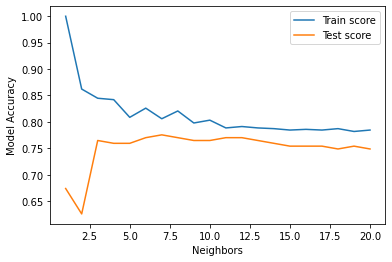

In [89]:
# First Let's tune KNN
train_score_knn = []
test_score_knn  = []

# Let's create a list for different neighbors
neighbors = range(1, 21)
start = time.time()
# Setup knn instance
knn_tuned = KNeighborsClassifier()

# loop through different neighbors
for i in neighbors:
    knn_tuned.set_params(n_neighbors = i)
    
    # Fit the model
    knn_tuned.fit(X_train_class, y_train_class)
    
    # Update the training score list
    train_score_knn.append(knn_tuned.score(X_train_class, y_train_class))
    
    # Update the test score list
    test_score_knn.append(knn_tuned.score(X_test_class, y_test_class))
end = time.time()
# Let's Plot And Viusalize The KNN Tunned Model
plt.plot(neighbors, train_score_knn, label= "Train score")
plt.plot(neighbors, test_score_knn, label= "Test score")
plt.xlabel("Neighbors")
plt.ylabel("Model Accuracy")
plt.legend()

print(f"Maximum Tuned KNN score on Test data: {max(test_score_knn)*100 :.2f}%")
print("Tuned KNN took: " + str((end - start)) + "seconds.")

In [90]:
np.random.seed(42)

rf_params = {"n_estimators": np.arange(10,1000,50),
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2),
                  "bootstrap": [True, False],
                  "max_features": ['auto', 'sqrt']
}

start = time.time()
tuned_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                           param_distributions=rf_params,
                           cv=5,
                           verbose=True,
                           n_iter=1000)
tuned_rf.fit(X_train_class, y_train_class)
end = time.time()
print("Random Search CV Tuned Random Forest Classifier took: " + str((end - start)) + "seconds.")

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Random Search CV Tuned Random Forest Classifier took: 3790.198296546936seconds.


In [91]:
tuned_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [92]:
tuned_rf.score(X_test_class, y_test_class)

0.9090909090909091

#Section 6.5: Stacking
In this section, similarly as above, we found that our oob score is high, therefore the generalisability of our model is good.

In [93]:
# Create train and test splits
X_pass_train_full, X_pass_test_new, y_pass_train_full, y_pass_test_new = train_test_split(X_new_2, y_pass_df, test_size=0.2, random_state=42)
X_pass_train_new, X_pass_valid, y_pass_train_new, y_pass_valid = train_test_split(X_pass_train_full, y_pass_train_full, test_size=0.2, random_state=42)


In [94]:
X_pass_predictions = np.empty((len(X_pass_valid), 3), dtype = object)

X_pass_predictions[:, 0] = classifierLR_class.predict(X_pass_valid)
X_pass_predictions[:, 1] = classifierRF_class.predict(X_pass_valid)
X_pass_predictions[:, 2] = knn_base.predict(X_pass_valid)

In [95]:
start = time.time()
rf_oob = RandomForestClassifier(oob_score=True, random_state=42)
rf_pred_oob = rf_oob.fit(X_pass_predictions, y_pass_valid)
end = time.time()
print("Stacked Random Forest Classifier took: " + str((end - start)) + "seconds.")

Stacked Random Forest Classifier took: 0.23601198196411133seconds.


In [96]:
rf_oob.oob_score_

1.0

In [97]:
from sklearn.metrics import accuracy_score
rf_pred_y = rf_pred_oob.predict(X_pass_predictions)
print('\nThe score of the training set is:', accuracy_score(y_pass_valid, rf_pred_y))


The score of the training set is: 1.0


In [98]:
X_test_pred = np.empty((len(X_test_class), 3), dtype = object)

X_test_pred[:, 0] = log_tuned.predict(X_test_class)
X_test_pred[:, 1] = tuned_rf.predict(X_test_class)
X_test_pred[:, 2] = knn_tuned.predict(X_test_class)

In [99]:
y_pred_rf = rf_oob.predict(X_test_pred)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_class, y_pred_rf)

0.9090909090909091

#**Section 7: Feature Importance**
Main goal is to check if G2 & G1 is really one of the most important features in determining G3.

#Section 7.1: Logistic Regression

Feature Importance

0.9197860962566845


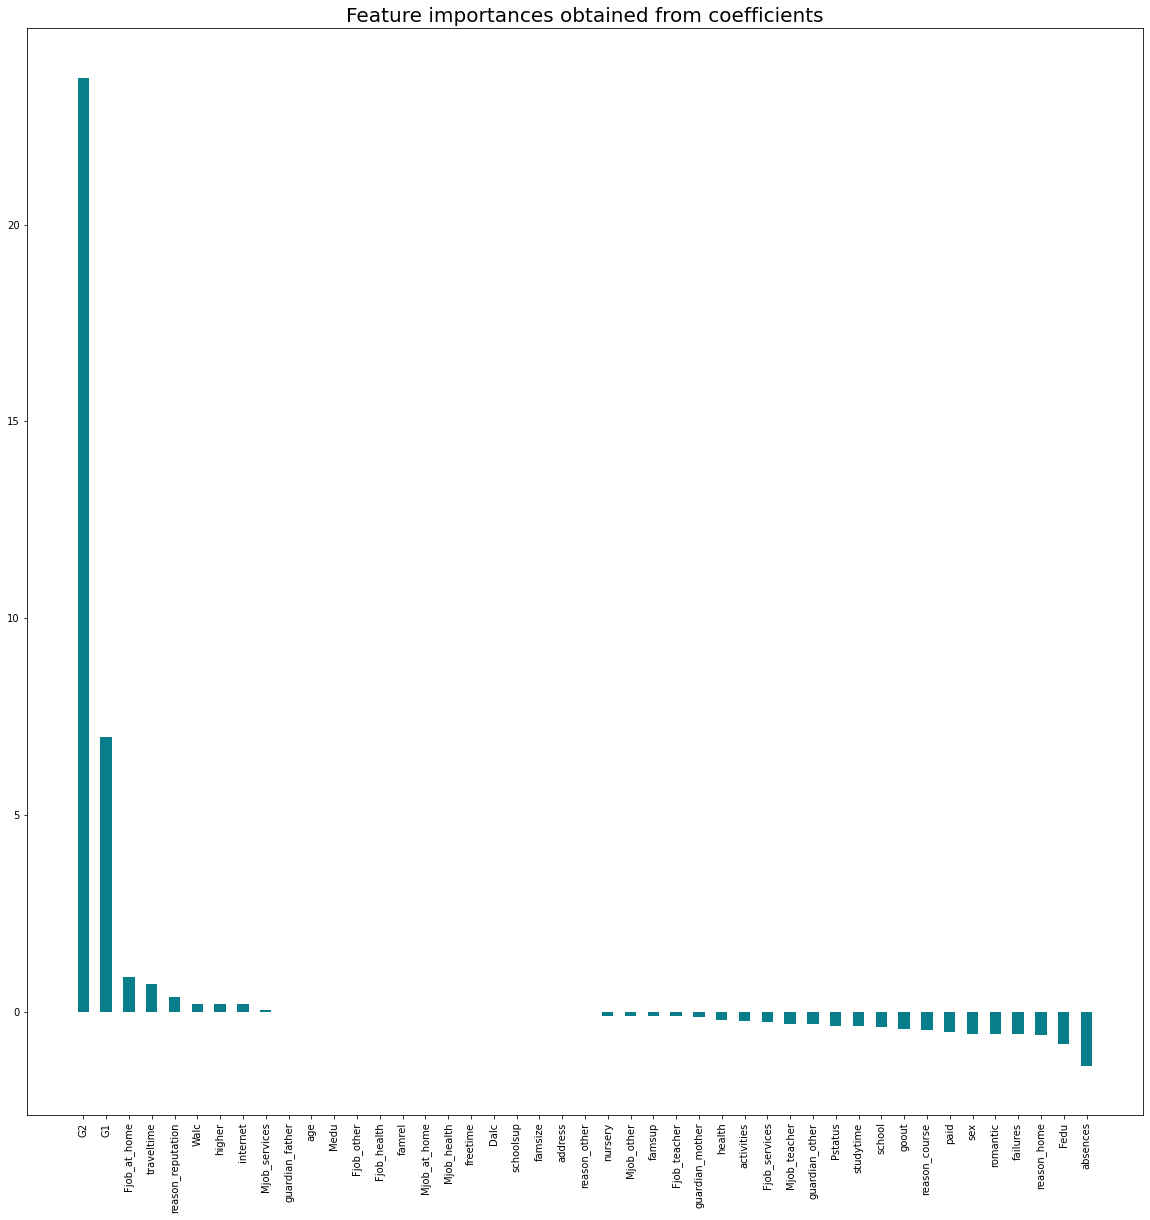

In [101]:
log_classifier_tuned = LogisticRegression(C= 1.623776739188721, penalty= 'l1', solver= 'liblinear', random_state=42)
log_classifier_tuned.fit(X_train_class,y_train_class)

#Score LR
print(log_classifier_tuned.score(X_test_class, y_test_class))

#Feature Importance
log_importances = pd.DataFrame(data={
    'Attribute': X_train_class.columns,
    'Importance': log_classifier_tuned.coef_[0]
})
log_importances = log_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20,20))
plt.bar(x=log_importances['Attribute'], height=log_importances['Importance'], color='#087E8B',width=0.5, )
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


#Prediction
y_pred_logistic_reg = log_classifier_tuned.predict(X_test_class)

Confusion Matrix & Classification Report

In [102]:
from sklearn.metrics import confusion_matrix
cm_tuned_logistic=confusion_matrix(y_test_class,y_pred_logistic_reg)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
tuned_logistic_report=classification_report(y_test_class,y_pred_logistic_reg)

In [103]:
print(cm_tuned_logistic)
print(tuned_logistic_report)

[[ 37  11]
 [  4 135]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        48
           1       0.92      0.97      0.95       139

    accuracy                           0.92       187
   macro avg       0.91      0.87      0.89       187
weighted avg       0.92      0.92      0.92       187



#Section 7.2: Random Forest Classifier

Feature Importance

0.9144385026737968
school:0.007751794666597152
sex:0.006249290927187925
address:0.006769176176816632
famsize:0.006205982266468755
Pstatus:0.002685150173022144
schoolsup:0.007617498432076356
famsup:0.006422576601311646
paid:0.008647625593889582
activities:0.008428736135808947
nursery:0.00641071420402454
higher:0.011477348073423144
internet:0.006543627404558719
romantic:0.0073237462748098085
Mjob_at_home:0.00489988848694417
Mjob_health:0.003273479720902928
Mjob_other:0.00662710778802525
Mjob_services:0.004668460550692048
Mjob_teacher:0.004269250607410736
Fjob_at_home:0.0027192770151927424
Fjob_health:0.0015173418216824263
Fjob_other:0.006994780834869169
Fjob_services:0.005562384427195298
Fjob_teacher:0.002094239014485375
reason_course:0.0077997977014612856
reason_home:0.005720001086692297
reason_other:0.004599191585104502
reason_reputation:0.0060373236368788516
guardian_father:0.005983391848013913
guardian_mother:0.004989690351523645
guardian_other:0.004493176452138046
age:0.023132660280

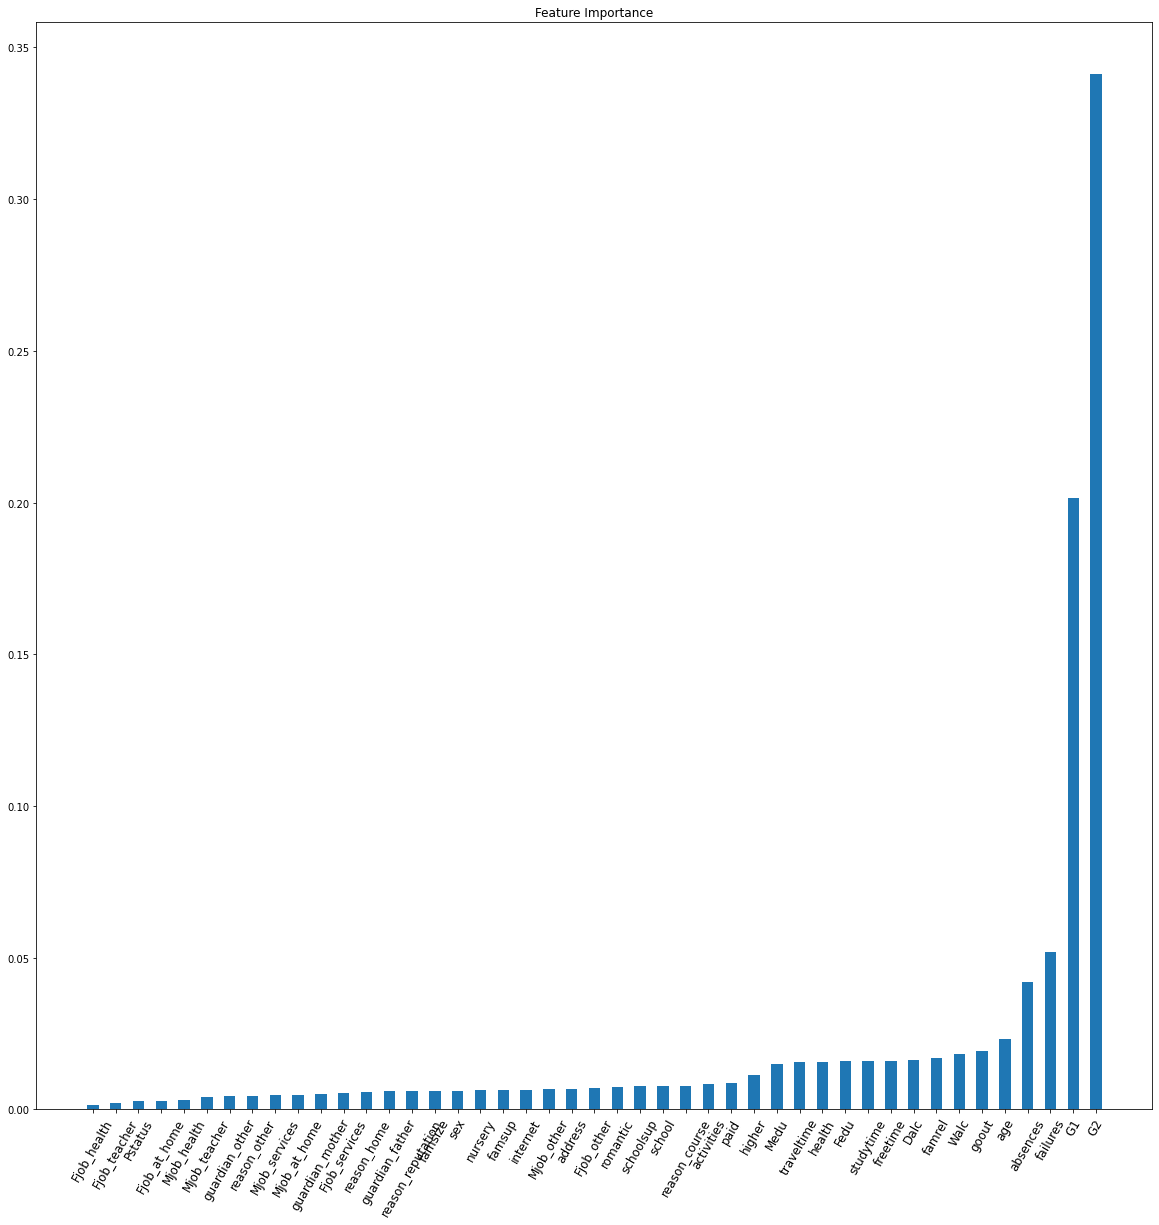

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
#RandomForest
classifierRF_tuned=RandomForestClassifier(random_state=42)
classifierRF_tuned.fit(X_train_class,y_train_class)

print(classifierRF_tuned.score(X_test_class, y_test_class))



#predicting the test set re4sults
y_pred_rf_tuned=classifierRF_tuned.predict(X_test_class)

importances_rf=classifierRF_tuned.feature_importances_
for feature, importance in zip(X_train_class.columns, classifierRF_tuned.feature_importances_):
    print("{}:{}".format(feature, importance))
indices_1 = np.argsort(importances_rf)

# Rearrange feature names so they match the sorted feature importances
names = [X_train_class.columns[i] for i in indices_1]

# Barplot: Add bars

plt.figure(figsize=(20,20))
plt.bar(range(X_test_class.shape[1]), importances_rf[indices_1],width=0.5)
# Add feature names as x-axis labels
plt.xticks(range(X_train_class.shape[1]),names, rotation=60, fontsize = 12)
#from here we cam see that absences is the important features for determining the grades of students

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

#determinnig the confusion matrix
from sklearn.metrics import confusion_matrix
cm_rf_tuned=confusion_matrix(y_test_class,y_pred_rf_tuned)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_rf_tuned=classification_report(y_test_class,y_pred_rf_tuned)


Confusion Matrix & Classification Report

In [105]:
print(cm_rf_tuned)
print(report_rf_tuned)

[[ 35  13]
 [  3 136]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        48
           1       0.91      0.98      0.94       139

    accuracy                           0.91       187
   macro avg       0.92      0.85      0.88       187
weighted avg       0.91      0.91      0.91       187



#Section 7.3: K Nearest Neighbour


Confusion Matrix & Classification Report

In [106]:
y_pred_knn_tuned = knn_tuned.predict(X_test_class)

cm_knn_tuned = confusion_matrix(y_test_class,y_pred_knn_tuned)

#determining the precision,recall and f1-score 

report_tuned_knn=classification_report(y_test_class,y_pred_knn_tuned)

In [107]:
print(cm_knn_tuned)
print(report_tuned_knn)

[[  2  46]
 [  1 138]]
              precision    recall  f1-score   support

           0       0.67      0.04      0.08        48
           1       0.75      0.99      0.85       139

    accuracy                           0.75       187
   macro avg       0.71      0.52      0.47       187
weighted avg       0.73      0.75      0.66       187



#**Section 8: Final Thoughts**
- G2 is indeed the most important feature in determining G3_pass, and we can infer that students will be more likely to do better in subsequent exams after performing well in their prior exams. 
- Hence, this reinforces our first findings that students that do well, continue to do well in their future exams, showing why G2 is the top most important feature in determining annual_grades_evaluation.